In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import ticker
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(r'model_results.csv',sep=',')#transfer_results

In [4]:
data.groupby("model")['model'].count()

model
GRU      624
LASSO    624
LSTM     624
MLP      624
RF       624
SGD      624
Name: model, dtype: int64

In [5]:
#parameters
model_for=[ "MLP","LSTM","GRU","SGD", "RF", "LASSO",]
colour = sns.color_palette("Set1", 15)
index=[3,2,0,5,4,1]
alpha=0.60
group1=1
group2=3
group3=2
deep=0
machine=4
alpha2=0.15

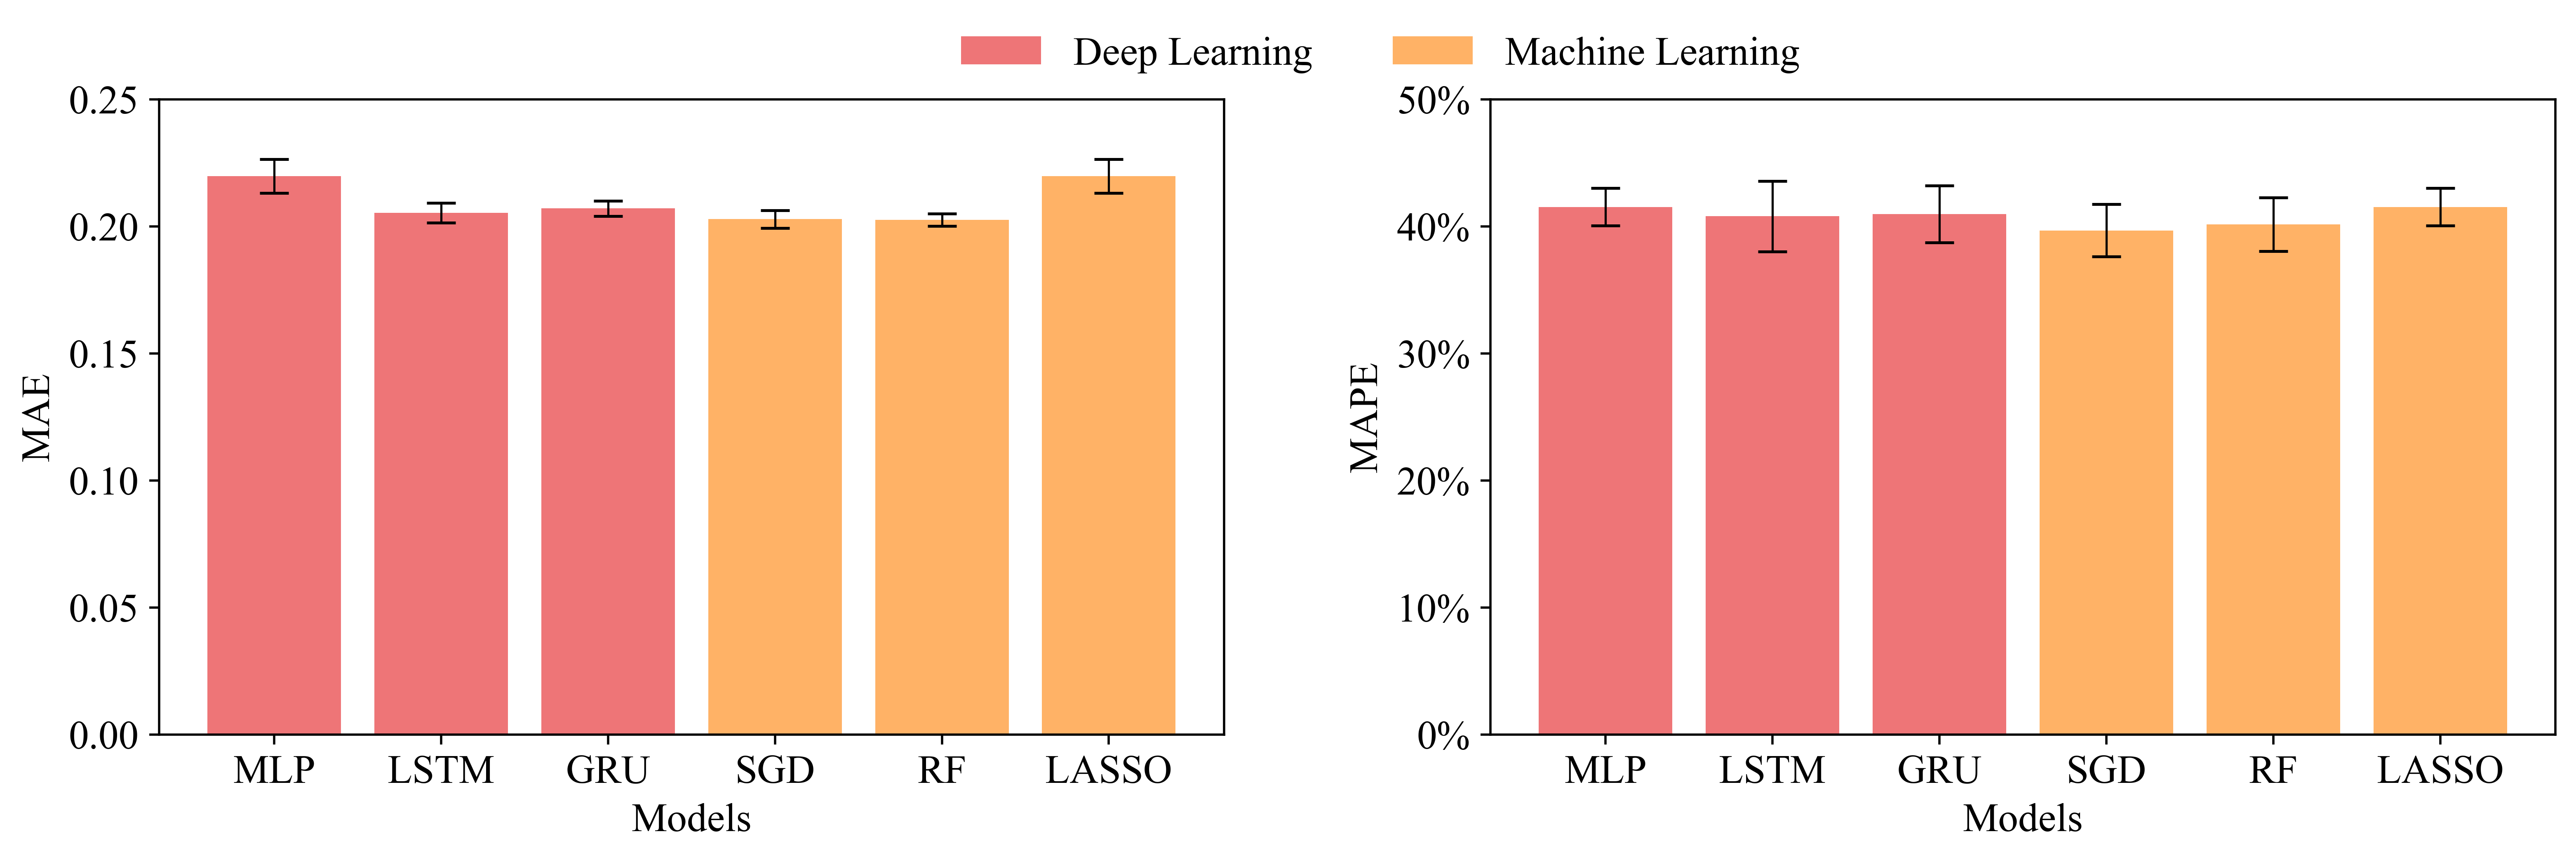

In [6]:
#Applicability_6 models

data1=data#[data['city/station']=="station"]
data1=data1[data1['source \ target']=='wo_trans'] 
data21=data1#[data1['prelen']==1]
data21=data21[data21['trainlen']>=5]

#Figure
fig=plt.figure(figsize=(15,4), dpi=500)
plt.rc('font',family='Times New Roman', size=14)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.25,hspace=0.5)
error_params1=dict(elinewidth=0.75,ecolor="black",capsize=5)#error

#Figure 1
data32=data21[data21['metric']=='mae']
data32['mean']=data32.T.iloc[7:,:].mean()
data34=np.array(data32.groupby( "model")['mean'].agg('std'))[index]
data9=np.array(data32.groupby( "model")["mean"].agg([np.mean]).iloc[:,-1])[index]
plt.subplot(1,2,1)
plt.bar(range(len(model_for)),data9, yerr=data34,error_kw=error_params1,alpha=alpha,
        color=[colour[deep],colour[deep],colour[deep],colour[machine],colour[machine],colour[machine]])
plt.xticks(range(len(model_for)),model_for)
plt.ylim(0,0.25)
plt.ylabel('MAE')
plt.xlabel("Models")
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))



#Figure 2
data32=data21[data21['metric']=='mape']
data32['mean']=data32.T.iloc[7:,:].mean()
data34=np.array(data32.groupby( "model")['mean'].agg('std'))[index]
data9=np.array(data32.groupby( "model")["mean"].agg([np.mean]).iloc[:,-1])[index]
plt.subplot(1,2,2)
plt.bar(range(len(model_for)),data9,yerr=data34,error_kw=error_params1,alpha=alpha,
        color=[colour[deep],colour[deep],colour[deep],colour[machine],colour[machine],colour[machine]])
plt.xticks(range(len(model_for)),model_for)

#Labels
plt.bar(0,0.0, color=colour[deep],label="Deep Learning",alpha=alpha,)
plt.bar(2,0.0, color=colour[machine],label="Machine Learning",alpha=alpha,)

plt.ylim(0,0.5)
plt.ylabel('MAPE')
plt.xlabel("Models")
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

fig.legend(loc="upper center" , bbox_to_anchor=(0.52, 1), ncol=2, framealpha=0)
fig.savefig('Figure2(a)(b).svg', format='svg',transparent=True, bbox_inches='tight', pad_inches=0.0)
fig.show()

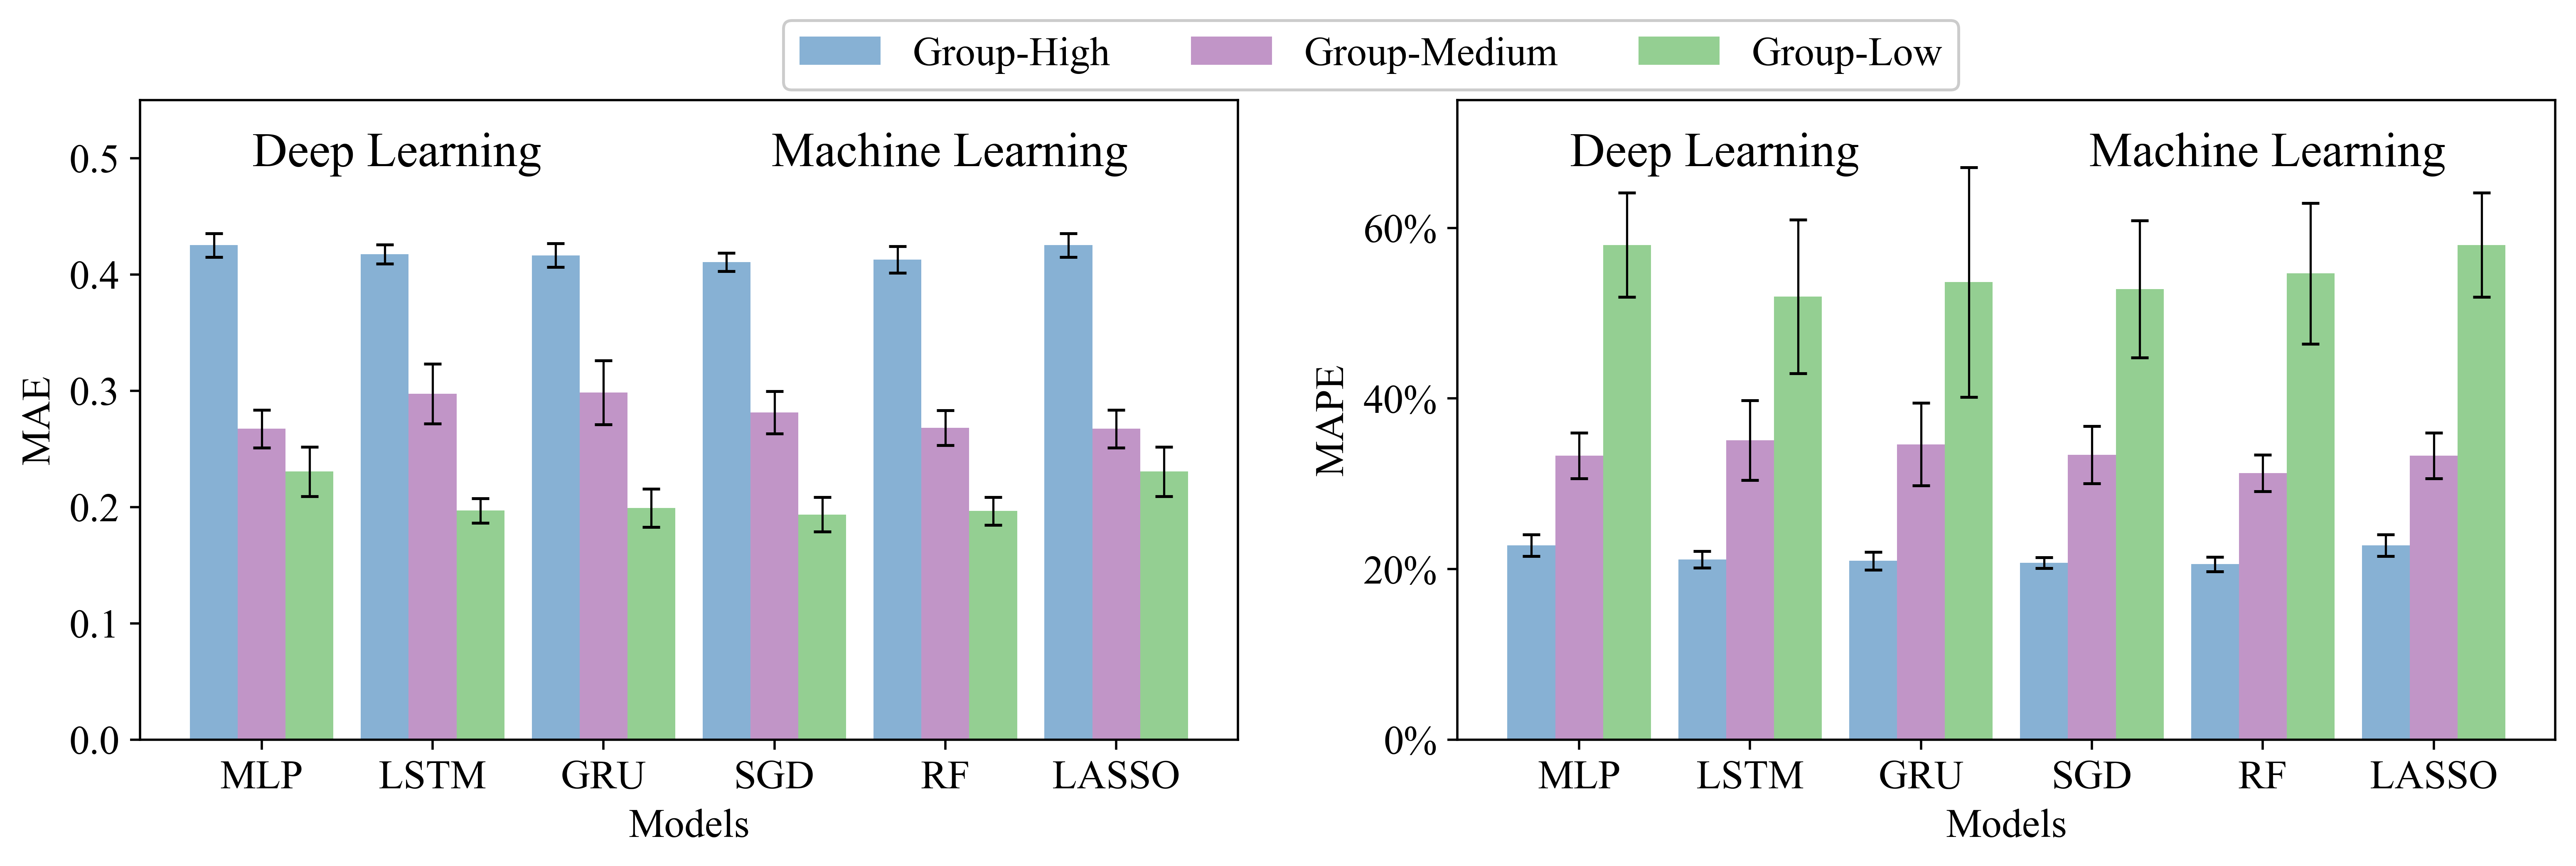

In [9]:
# 初始参数
model_for = ["MLP", "LSTM", "GRU", "SGD", "RF", "LASSO"]
colour = sns.color_palette("Set1", 15)
index = [3, 2, 0, 5, 4, 1]
alpha = 0.60
group1 = 1
group2 = 3
group3 = 2
bar_width = 0.28
size = 14
error_params1 = dict(elinewidth=0.75, ecolor="black", capsize=3)
groups = {
    'High': {"colour": colour[group1], "citys": ["Perth", 'DUNDEE', "HK"]},
    'Medium': {"colour": colour[group2], "citys": ["PALO", "Crieff", "Aberfeldy", "Pitlochry", "Kinross"]},
    'Low': {"colour": colour[group3], "citys": ["BOULDER", "Auchterarder", "Dunkeld", "Blairgowrie"]}
}


def plot_grouped_data(metric, ax, title_suffix):
    for i, (group_name, details) in enumerate(groups.items()):
        data_selected = data21[data21['metric'] == metric]
        data_selected = data_selected[['model'] + details['citys']]
        stds = data_selected.groupby('model').std()
        means = data_selected.groupby('model').mean()
        stds['mean'] = stds.mean(axis=1)
        means['mean'] = means.mean(axis=1)
        ax.bar(np.arange(len(model_for)) + i*bar_width, 
               means['mean'].reindex(model_for), 
               width=bar_width, 
               yerr=stds['mean'].reindex(model_for), 
               alpha=alpha, 
               color=details['colour'], 
               error_kw=error_params1, 
               label=f'Group-{group_name}')

    ax.set_xticks(np.arange(len(model_for)) + bar_width)
    ax.set_xticklabels(model_for)
    ax.set_xlabel("Models")
    ax.set_ylabel(metric.upper())
    ax.set_title(title_suffix, loc='right',y=0.87,x=0.9)


# Filter data
data1 = pd.read_csv(r'model_results.csv',sep=',')#data
data21 = data1[data1['source \\ target'] == 'wo_trans']
data21 = data21[data21['trainlen'] >= 3]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(15, 4), dpi=500)
plt.rc('font', family='Times New Roman', size=size)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

# Plot MAE
plot_grouped_data('mae', axes[0],  "Deep Learning                   Machine Learning")
axes[0].set_ylim(0, 0.55)

# Plot MAPE
plot_grouped_data('mape', axes[1], "Deep Learning                   Machine Learning")
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
axes[1].set_ylim(0., 0.75)

# Get legend handles and labels from each subplot
handles0, labels0 = axes[0].get_legend_handles_labels()
handles1, labels1 = axes[1].get_legend_handles_labels()

# Combine handles and labels from both subplots
handles = handles0 + handles1
labels = labels0 + labels1

# Remove duplicates from both handles and labels
unique = dict(zip(labels, handles))
labels = list(unique.keys())
handles = list(unique.values())
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.52, 1.), ncol=3, framealpha=1)
fig.savefig('Figure2(c)(d).svg', format='svg',transparent=True, bbox_inches='tight', pad_inches=0.0)
plt.show()


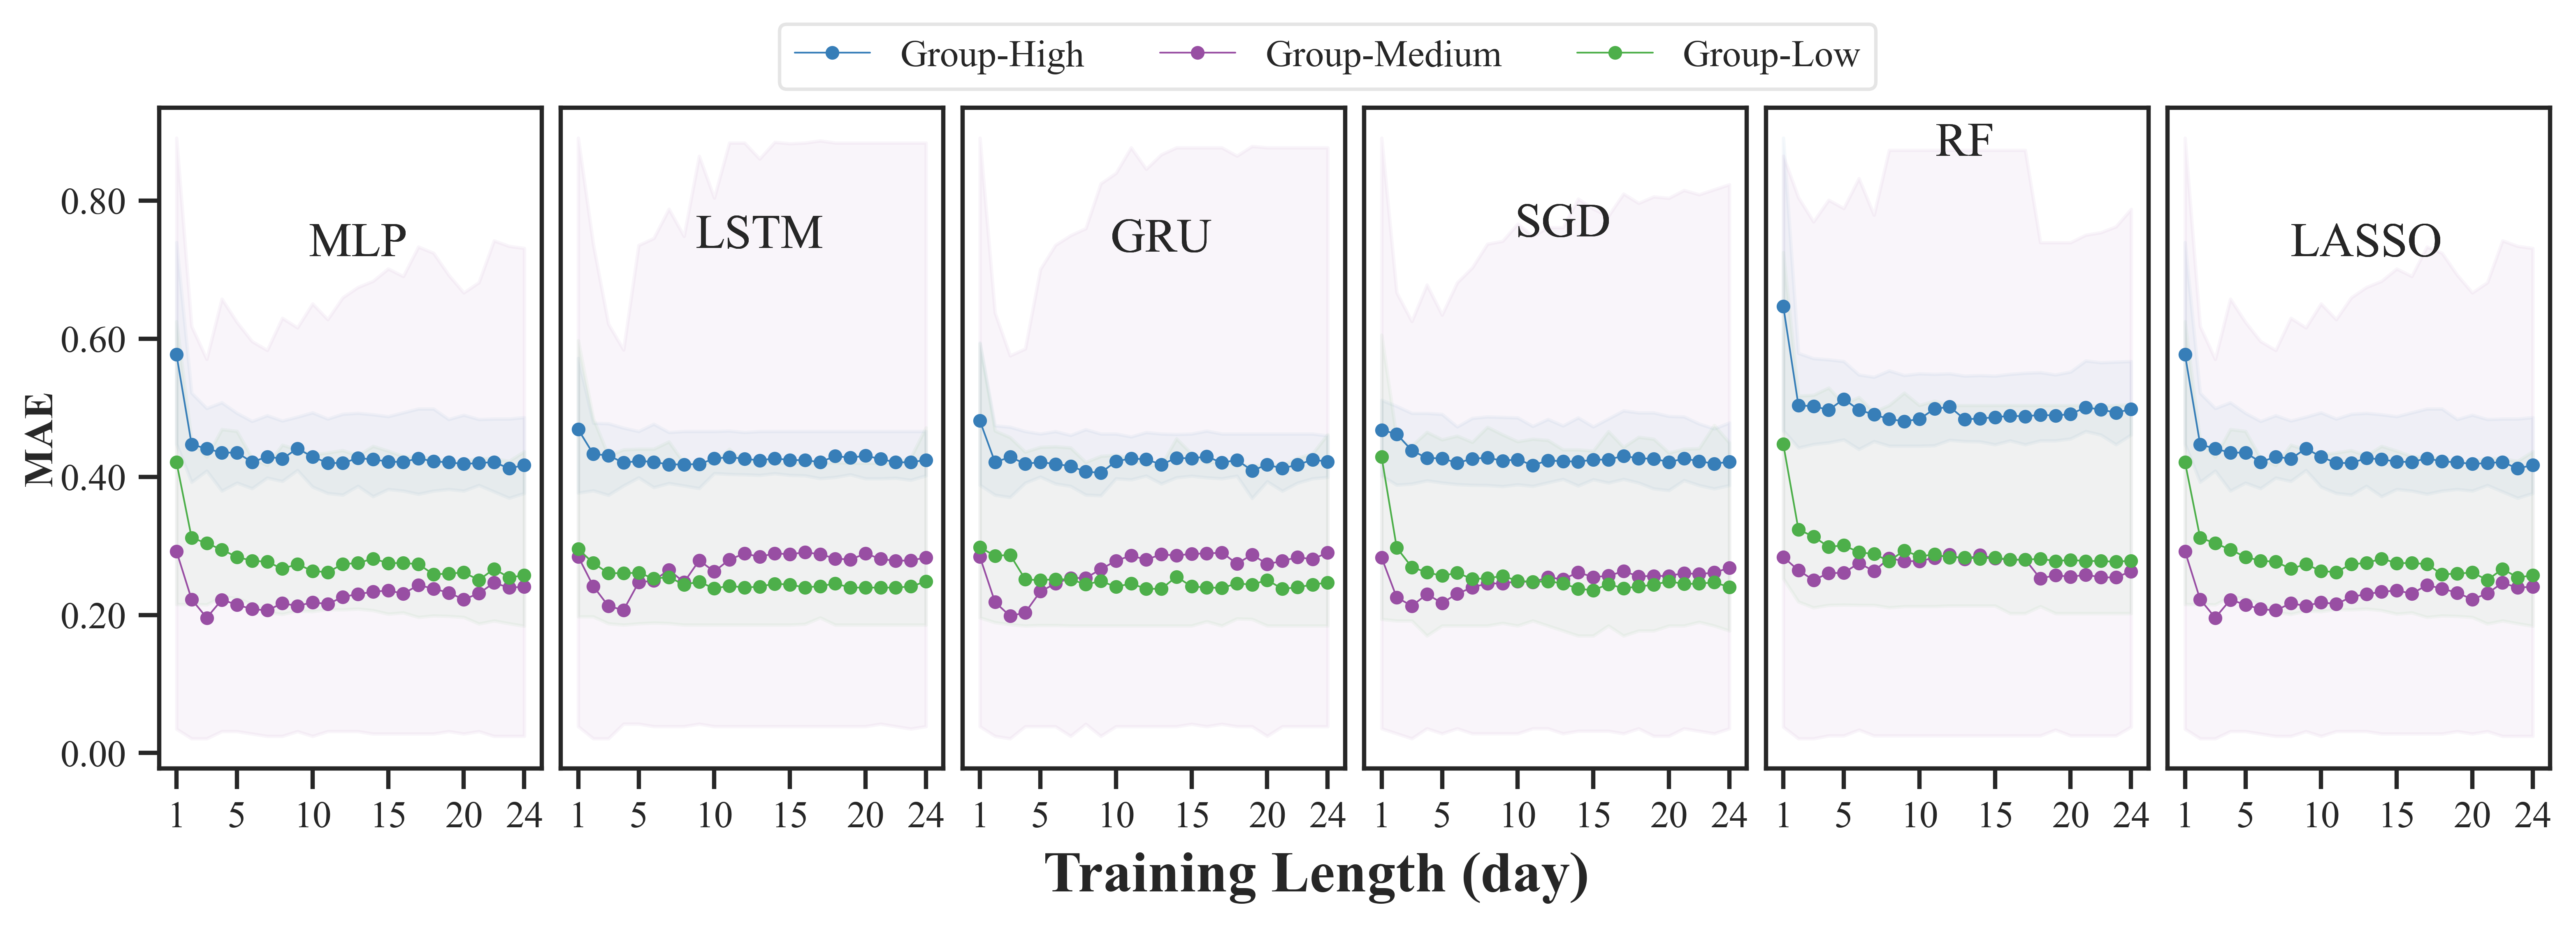

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

def plot_data(group_name, color, data_for_plot, models, ax_pos):
    """
    A function to plot the data for a particular group.
    """
    for j in range(6):
        data33 = data_for_plot[data_for_plot['model'] == models[j]]
        t = data33['mean']
        p = range(1, len(t) + 1)
        ax = plt.subplot(ax_pos[0], ax_pos[1], j + 1)
        ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
        ax.tick_params(axis='x', which='both', bottom=True)
        
        
        label = group_name if j == 0 else None
        ax.plot(p, t, color=color, linestyle="-", marker=".", linewidth=0.5, label=label)
    
        plt.fill_between(p, data33["min_val"], data33["max_val"], color=color, alpha=0.05)
        ax.set_xticks([1, 5, 10, 15, 20, 24]) 
 
        if j == 0:
            plt.ylabel('MAE', labelpad=0.01, weight='extra bold')
            ax.tick_params(axis='y', which='both', left=True, labelleft=True)

        else:
            ax.get_yaxis().set_visible(False)
        
        ax.text(13, 0.72, models[j], ha="center", size=size, weight="light")

def get_data_for_group(data, metric, columns):
    """
    Extracts and processes data for the given metric and columns.
    """
    data_group = data[data['metric'] == metric][columns]
    data_group['mean'] = data_group.iloc[:, 1:].mean(axis=1)
    data_group['max_val'] = data_group.iloc[:, 1:].max(axis=1)
    data_group['min_val'] = data_group.iloc[:, 1:].min(axis=1)
    return data_group

sns.set_style("white")
sns.set_context("notebook")
colour = sns.color_palette("Set1", 15)
data21 = data[data['source \\ target'] == 'wo_trans']
size = 14
fig = plt.figure(figsize=(12.5, 8), dpi=600)
plt.rc('font', family='Times New Roman', size=size)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.3)

# Process and plot data for Group-High
data_high = get_data_for_group(data21, 'mae', ['model', "Perth", 'DUNDEE', "HK"])
plot_data("Group-High", colour[group1], data_high, model_for, (2, 6))

# Process and plot data for Group-Medium
data_med = get_data_for_group(data21, 'mae', ['model', "PALO", "Crieff", "Aberfeldy", "Pitlochry"])
plot_data("Group-Medium", colour[group2], data_med, model_for, (2, 6))

# Process and plot data for Group-Low
data_low = get_data_for_group(data21, 'mae', ['model', "Kinross", "BOULDER", "Auchterarder", "Dunkeld", "Blairgowrie"])
plot_data("Group-Low", colour[group3], data_low, model_for, (2, 6))

fig.suptitle('Training Length (day)', y=0.49, ha='center', va='center', weight='extra bold')
fig.legend(loc="lower left", bbox_to_anchor=(0.32, 0.88), ncol=3, framealpha=0.5)
plt.savefig('Figure_2_e.png', transparent=True, bbox_inches='tight', pad_inches=0.0)
plt.show()
